### 1. Import library and read file csv

In [ ]:
import numpy as np
import pandas as pd
import cv2
from ast import literal_eval
import cv2
import matplotlib.pyplot as plt

import glob

train_df = pd.read_csv("/content/drive/MyDrive/VinBigData Chest X-ray Abnormalities Detetion/train.csv")
train_df.columns =['image_id','x_min', 'y_min',	'x_max', 'y_max','class_id']

train_df.head()

In [ ]:
train_df['x_mid'] = train_df.apply(lambda row: (row.x_max+row.x_min)/2, axis =1)
train_df['y_mid'] = train_df.apply(lambda row: (row.y_max+row.y_min)/2, axis =1)

train_df['w'] = train_df.apply(lambda row: (row.x_max-row.x_min), axis =1)
train_df['h'] = train_df.apply(lambda row: (row.y_max-row.y_min), axis =1)
train_df.head()

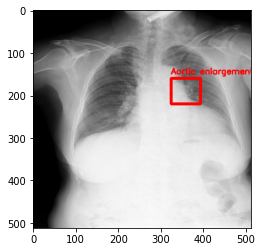

In [ ]:
fr = cv2.imread("/content/drive/MyDrive/VinBigData Chest X-ray Abnormalities Detetion/train512/051132a778e61a86eb147c7c6f564dfe.png")
frame_rgb = cv2.cvtColor(fr, cv2.COLOR_BGR2RGB)
frame_rgb = cv2.rectangle(frame_rgb, (324, 160), (324 + 69, 160 + 60), (255, 0, 0), 5)
cv2.putText(frame_rgb, 'Aortic enlargement', (324, 160 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2)
plt.imshow(frame_rgb)

### 2. Convert data

In [ ]:
train_df['x_min'] = train_df.apply(lambda row: row.x_min/512, axis =1)
train_df['y_min'] = train_df.apply(lambda row: row.y_min/512, axis =1)

train_df['x_max'] = train_df.apply(lambda row: row.x_max/512, axis =1)
train_df['y_max'] = train_df.apply(lambda row: row.y_max/512, axis =1)

train_df['x_mid'] = train_df.apply(lambda row: (row.x_max+row.x_min)/2, axis =1)
train_df['y_mid'] = train_df.apply(lambda row: (row.y_max+row.y_min)/2, axis =1)

train_df['w'] = train_df.apply(lambda row: (row.x_max-row.x_min), axis =1)
train_df['h'] = train_df.apply(lambda row: (row.y_max-row.y_min), axis =1)

train_df['area'] = train_df['w']*train_df['h']
train_df.head()

,image_id,x_min,y_min,x_max,y_max,class_id,x_mid,y_mid,w,h,area
0,train512/051132a778e61a86eb147c7c6f564dfe.png,0.566406,0.253906,0.701172,0.371094,Aortic enlargement,0.633789,0.312500,0.134766,0.117188,0.015793
1,train512/051132a778e61a86eb147c7c6f564dfe.png,0.412109,0.441406,0.896484,0.582031,Cardiomegaly,0.654297,0.511719,0.484375,0.140625,0.068115
2,train512/051132a778e61a86eb147c7c6f564dfe.png,0.417969,0.462891,0.884766,0.564453,Cardiomegaly,0.651367,0.513672,0.466797,0.101562,0.047409
3,train512/051132a778e61a86eb147c7c6f564dfe.png,0.691406,0.158203,0.783203,0.210938,Pleural thickening,0.737305,0.184570,0.091797,0.052734,0.004841
4,train512/051132a778e61a86eb147c7c6f564dfe.png,0.554688,0.253906,0.701172,0.371094,Aortic enlargement,0.627930,0.312500,0.146484,0.117188,0.017166


### 3. Check BBox

In [ ]:
def convertYoloToPascal(size, coord):
    x_max = int(((2*size[0]*float(coord[0]))+(size[0]*float(coord[2])))/2)
    x_min = int(((2*size[0]*float(coord[0]))-(size[0]*float(coord[2])))/2)

    y_max = int(((2*size[1]*float(coord[1]))+(size[1]*float(coord[3])))/2)
    y_min = int(((2*size[1]*float(coord[1]))-(size[1]*float(coord[3])))/2)
    return (x_min,y_min,x_max,y_max)

convertYoloToPascal((512, 512), [0.633789, 0.312500, 0.134766, 0.117188])

(289, 129, 359, 190)

In [ ]:
def midPoint(x_min, y_min, x_max, y_max):
    x_mid = (x_max + x_min)//2
    y_mid = (y_max + y_min)//2
    w = (x_max - x_min)
    h = (y_max - y_min)
    return (x_mid, y_mid, w, h)

midPoint(289, 129, 359, 190)

(324, 159, 70, 61)

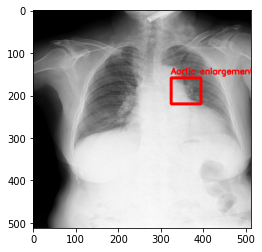

In [ ]:
fr = cv2.imread("/content/drive/MyDrive/VinBigData Chest X-ray Abnormalities Detetion/train512/051132a778e61a86eb147c7c6f564dfe.png")
frame_rgb = cv2.cvtColor(fr, cv2.COLOR_BGR2RGB)
frame_rgb = cv2.rectangle(frame_rgb, (324, 159), (324 + 70, 159 + 61), (255, 0, 0), 5)
cv2.putText(frame_rgb, 'Aortic enlargement', (324, 160 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 0), 2)
plt.imshow(frame_rgb)

### 4. Make file txt yolo label

In [ ]:
train_df['yolo_box'] = train_df[['x_min', 'y_min', 'w', 'h']].values.tolist()

print("We have {} unique images with boxes.".format(len(train_df.image_id.unique())))
unique_img_ids = train_df.image_id.unique()

%mkdir '/content/drive/MyDrive/VinBigData Chest X-ray Abnormalities Detetion/train512_vbd_train_data'
folder_location = "/content/drive/MyDrive/VinBigData Chest X-ray Abnormalities Detetion/train512_vbd_train_data"

for img_id in unique_img_ids: # loop through all unique image ids. Remove the slice to do all images
    filt_df = train_df.query("image_id == @img_id") # filter the df to a specific id
    #all_boxes = filt_df.yolo_box.values
    file_name = "{}/{}.txt".format(folder_location,img_id) # specify the name of the folder and get a file name
    # print(file_name)
    with open(file_name, 'w+') as file: # append lines to file
        for i in filt_df.iterrows():
            s = f"{i[1].class_id} %s %s %s %s \n" # The first number is the class name
            new_line = (s % tuple(i[1].yolo_box))
            file.write(new_line)

We have 3515 unique images with boxes.
mkdir: cannot create directory ‘/content/drive/MyDrive/VinBigData Chest X-ray Abnormalities Detetion/train512_vbd_train_data’: File exists


### 5. Zip the label



In [ ]:
%%capture

# zip to make files easier to download

!zip -r yolo_labels.zip "/content/drive/MyDrive/VinBigData Chest X-ray Abnormalities Detetion/train512_vbd_train_data"
